In [66]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/pandas-data-analysis/part7/data/auto-mpg.csv'
df = pd.read_csv(url, header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [67]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [68]:
# 데이터 통계 요약정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [69]:
# 결측치 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [70]:
# 중복 데이터 확인
df.duplicated().sum()

np.int64(0)

In [71]:
df.horsepower = pd.to_numeric(df.horsepower,errors='coerce')
df.horsepower = df.horsepower.apply(lambda x : x if isinstance(x,float) else pd.NA)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [73]:
# 결측치 데이터 처리방안
# 1. 결측치가 있는 데이터의 행들을 전부 출력
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [74]:
# 결측치는 제거
# df = df[~df.horsepower.isna()]
df = df.dropna()
# 결측치를 제거하면 index가 중간중간 비어있기 때문에 재 정렬 reset
df = df.reset_index(drop=True)

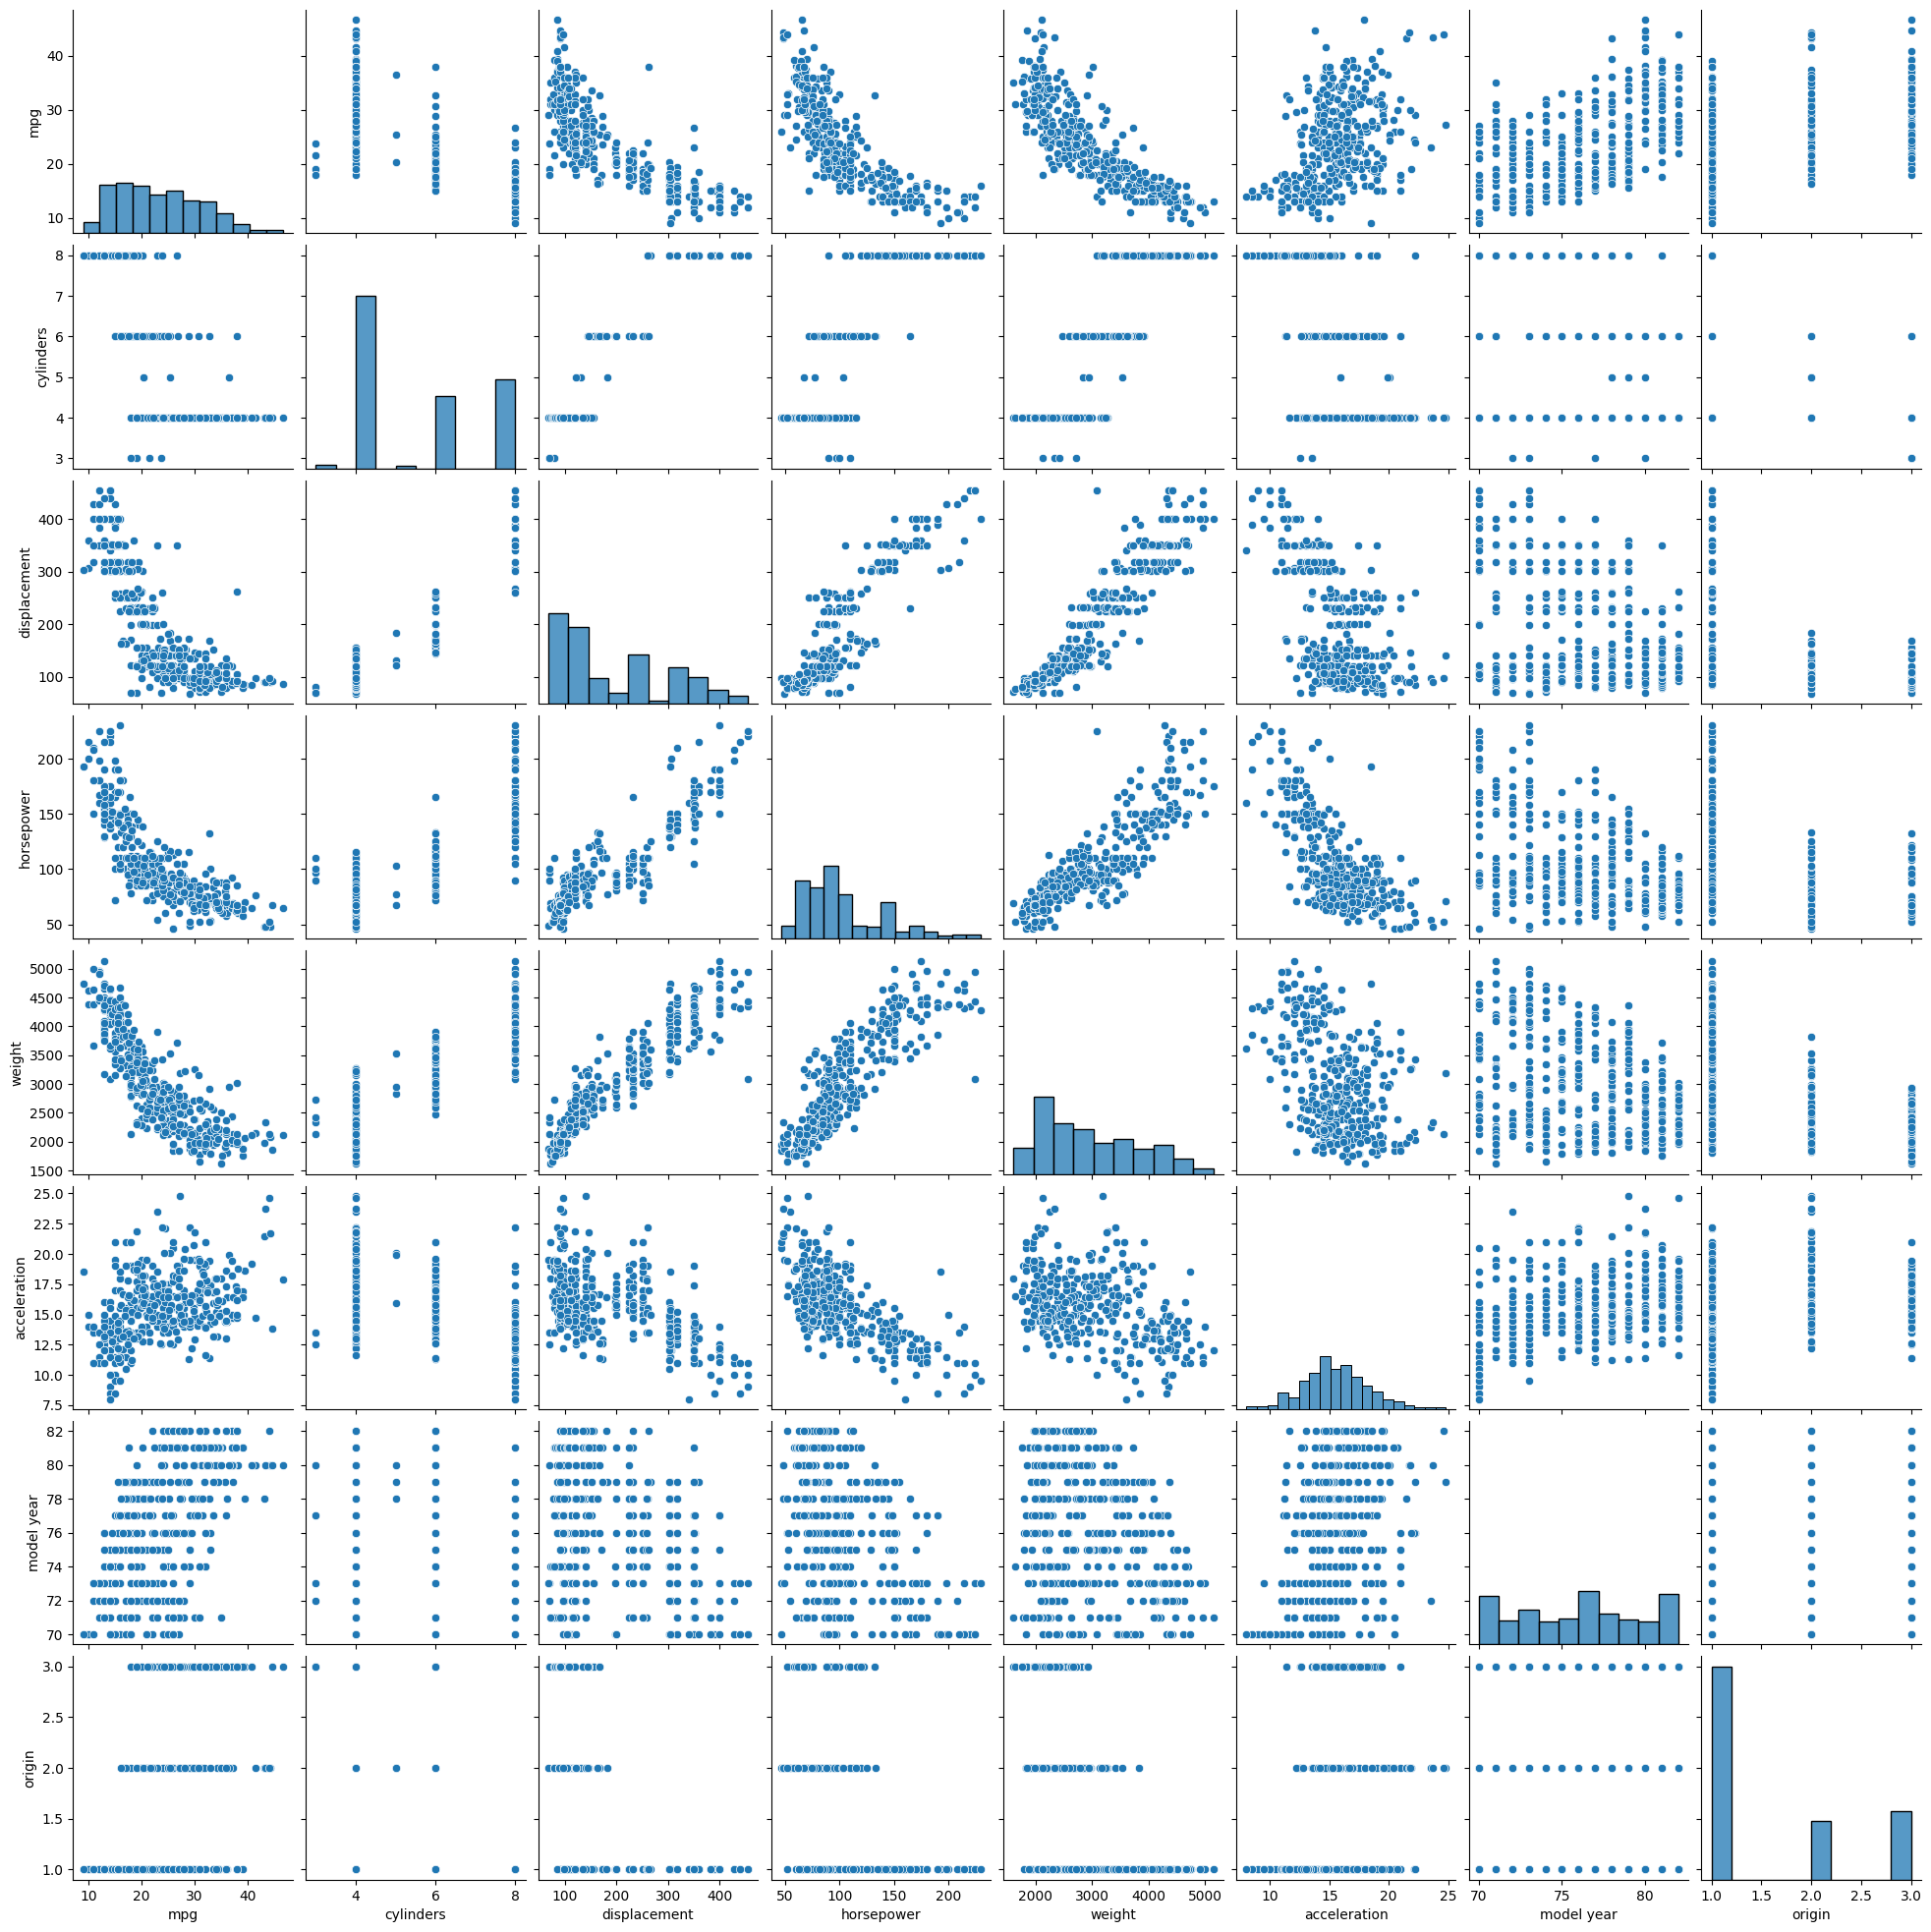

In [75]:
# seaborn pairplot   산점도
sns.pairplot(df)

In [76]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


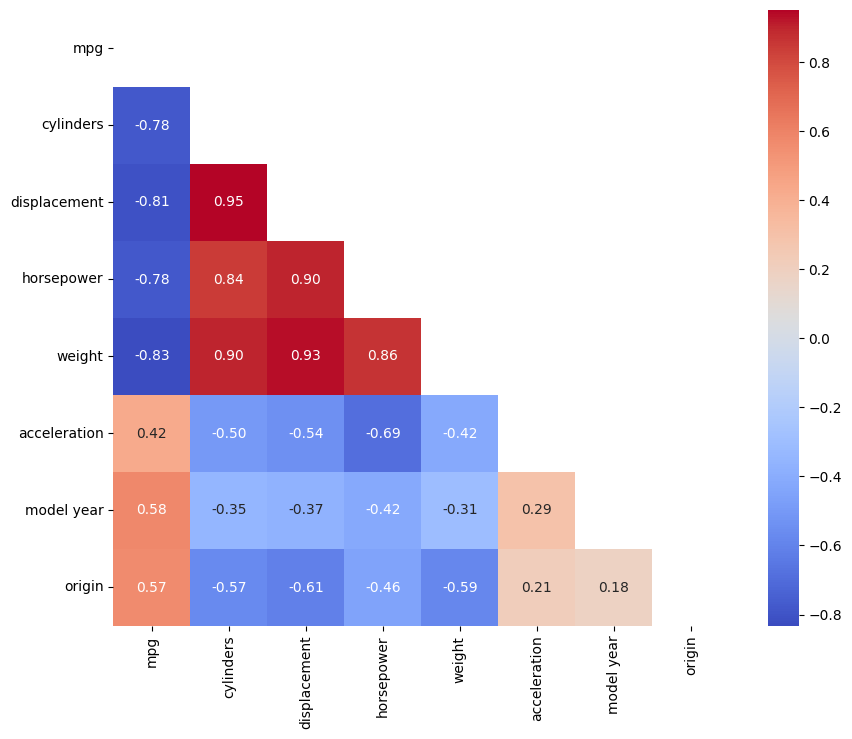

In [77]:
# 상관계수 분석 - 히트맵
mask = np.triu(np.ones_like(corr, dtype=bool))   # 마스크 생성 (상단 트라이앵글을 숨김)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

In [78]:
'''
[Step 3] 데이터 전처리
'''

# horsepower 열의 고유값 확인
df['horsepower'].unique()          

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [79]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)

# df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
# df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

df.describe()                                   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [80]:
# 결측치 제거
# print(df['horsepower'].isnull().sum())
# df_nan = df.dropna(subset=['horsepower'], axis=0)                 
print(df['horsepower'].isnull().sum())

0


In [81]:
# 결측치 대체
# print(df['horsepower'].isnull().sum())
# df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               
# print(df['horsepower'].isnull().sum())

In [82]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [83]:
# 수치형 데이터 선택  -displacement,acceleration,model year,origin
df.describe().columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [84]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
df = df[['mpg', 'cylinders', 'horsepower', 'weight']]
df.head() 

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


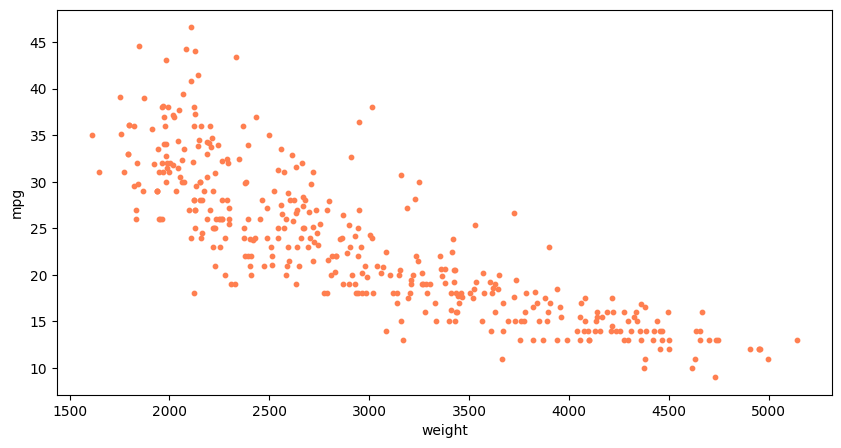

In [85]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

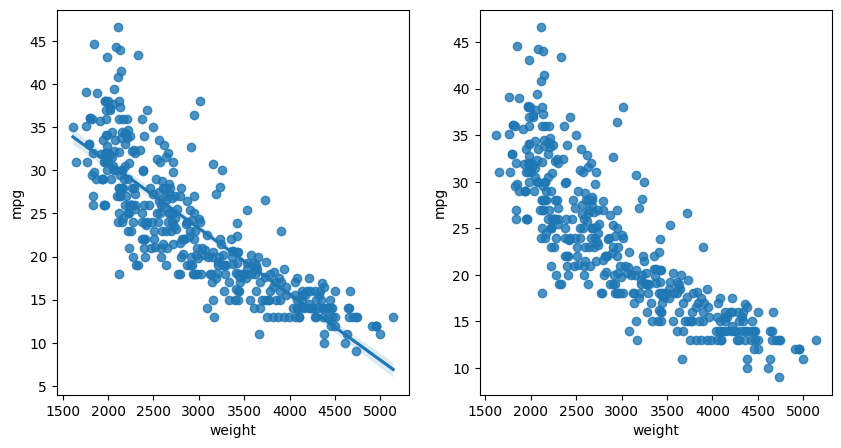

In [86]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=df, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=df, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()

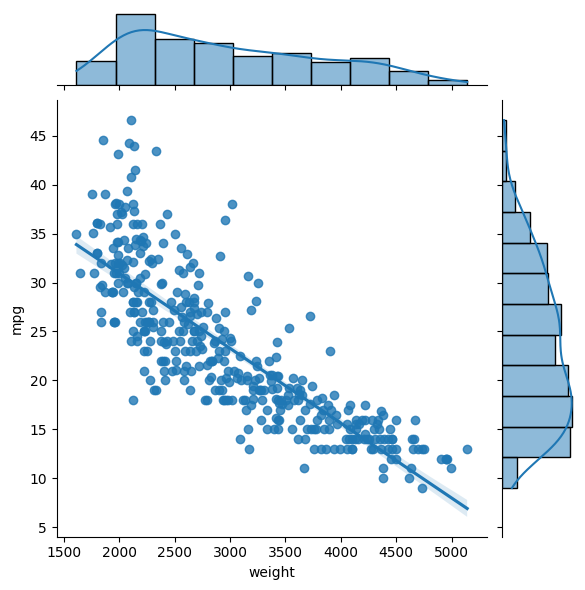

In [87]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
# sns.jointplot(x='weight', y='mpg', data=df);             # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=df);  # 회귀선 표시

In [88]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=df[['weight']]  #독립 변수 X
y=df['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print('total data 개수: ', len(X))

train data 개수:  274
test data 개수:  118
total data 개수:  392


In [89]:
'''
Step 5: 단순회귀분석 모델 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()   

# train data를 가지고 모델 학습
lr.fit(X_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.6822458558299325


In [90]:
# 학생들의 시험점수를 예측
# 1. 참고할 정보가 없다면.... 모든학생이 평균점수를 받을 거라고 예측
# 2. 실제는 평균보다 높거나 낮다... 그래서 오차가 발생.... 결정계수의 기준선
# 선형모델의 예측 
#  정보 : 공부시간 추가정보  가 있으면 공부시간, 시험점수의 관계를 선형회귀 모델로 만듦
# 결정계수가 0이면 그냥 평균을 출력하는 의미

In [91]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b', lr.intercept_)

# y = -0.00764998 x X + 46.449390410613006

기울기 a:  [-0.00775343]
y절편 b 46.7103662572801


In [92]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2
test_preds

,y_test,y_hat,squared_error
241,21.5,25.621032,16.982906
366,29.0,27.132951,3.485871
298,23.9,20.193630,13.737179
341,35.1,33.064327,4.143967
263,17.5,15.076365,5.874006
...,...,...,...
378,32.0,31.474873,0.275758
20,25.0,25.993197,0.986440
187,15.5,15.991270,0.241346
59,20.0,28.040103,64.643253


In [93]:
# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  17.9901789410548


In [94]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_hat,y_test)

17.9901789410548

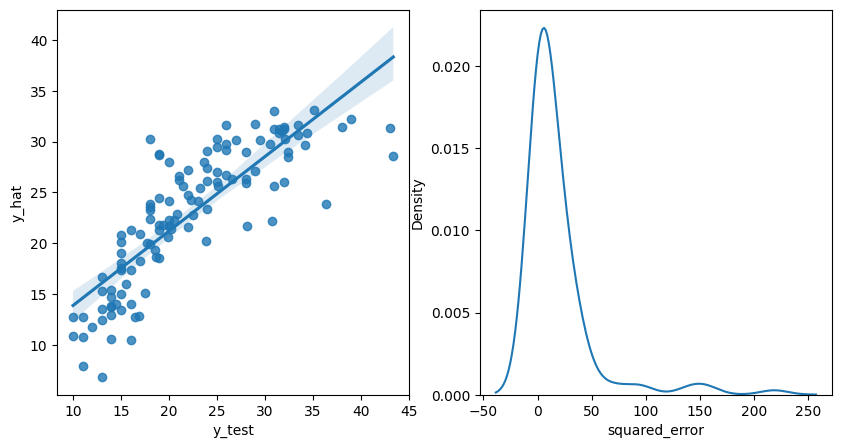

In [95]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat',  data=test_preds, ax=axes[0]);  
sns.kdeplot(x='squared_error',  data=test_preds, ax=axes[1]); 

In [96]:
# y_bar  : 모든 y값의 평균
# y_hat : 모델이 예측한 i번째 데이터의 값(예측)
# yi  :  i번째 데이터의 정답
# 결정계수 : 1 - SSR/SST
# SSR : 잔차제곱합   sumn((yi - y_hat)**2)  값이 작을수록 모델이 정확  (모델이 설명하지 못한 변동량)
# SST : 총 제곱합 sum((yi - y_bar)**2) : 단순 평균값으로 데이터의 흩어진 정도를 표현  (데이터의 총 변동량)
# 1- SSR/SST 1에서 오차비율을 뺀 값 --> 모델이 설명해낸 변동성의 비율
# 결정계수가 0.85 85예측이고 나머지 15는 예측을 못함

In [97]:
# 선형회귀는 단순히 MSE, MSA로 평가를 하면... 어느정도 좋은 모델인지 알수가 없다.?  기준이?
# 결정계수를 통해서 확률로 알수 있다

In [98]:
# 결측치를 제거했을때 와 대처했을때
# 독립변수를 weight가 아닌 다른 요소로 했을때 모델의 성능을 측정
# 정답과 선형관계가 뚜렸하거나 선형관계가 있다고 판단되는 변수를 선정
# 학습용 / 테스트용 데이터를 8:2로 분류
# 결정계수와 MSE 두개 출력하고 
# 예제처럼  오차 분석(시각화)

In [99]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/pandas-data-analysis/part7/data/auto-mpg.csv'
df = pd.read_csv(url, header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
df.head()
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')
# 평균값으로 대처
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

C:\Users\playdata2\AppData\Local\Temp\ipykernel_12072\862378502.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)


<Axes: xlabel='mpg', ylabel='displacement'>

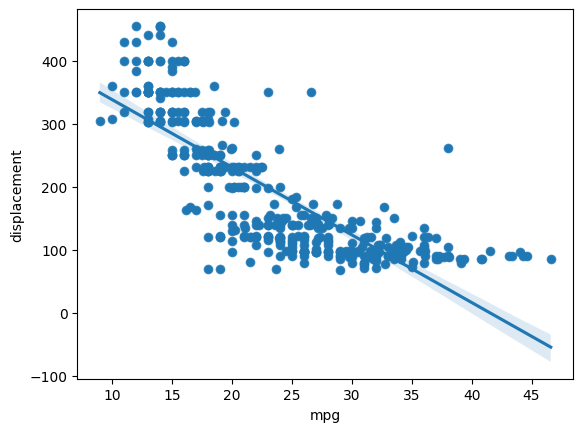

In [100]:
# mpg 와 선형성이 있는 컬럼들을 확인
# 상관계수 , 시각화(산점도), regplot
numeric_cols = df.describe().columns
df.loc[:,numeric_cols].corr()
sns.scatterplot(data=df, x='mpg', y='displacement')
sns.regplot(data=df, x='mpg', y='displacement')

In [124]:
#학습용과 테스트용 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['displacement','weight']],df.mpg, test_size=0.2,random_state=100)
len(x_train), len(y_train),len(x_test), len(y_test)

(318, 318, 80, 80)

In [125]:
# sklearn 계열의 데이터는 항상 2차원을 요구  demesion 2  
# 학습 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # 모델생성
lr.fit(x_train[['displacement']],y_train)  #모델을 학습용 데이터로 학습
# 결정계수
lr.score(x_test[['displacement']],y_test)

0.6799385908404352

In [126]:
# sklearn 계열의 데이터는 항상 2차원을 요구  demesion 2  
# 학습 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # 모델생성
lr.fit(x_train[['weight']],y_train)  #모델을 학습용 데이터로 학습
# 결정계수
lr.score(x_test[['weight']],y_test)

0.7373187848306613

In [132]:
x_train[['weight']]

,weight
149,2489.0
118,2158.0
287,3955.0
187,4215.0
190,4215.0
...,...
343,1755.0
359,3230.0
323,2800.0
280,3245.0


In [114]:
# 데이터 정규화 또는 스케일링, 이상치 여부 확인하고 제거
# 정규화 : Min-Max Scaling  데이터를 0~1사의 값으로 압축
# 표준화 : StandardScaler : 데이터를 평균 0 표준편차 1
# 이상치 제거
# 구간화 : 범주형 데이터로 변환

In [129]:
from sklearn.preprocessing import StandardScaler
sds = StandardScaler()
x_scaled_train = sds.fit_transform(x_train[['weight']])
x_scaled_test = sds.transform(x_test[['weight']])
len(x_scaled_train),len(x_scaled_test)

(318, 80)

In [133]:
x_scaled_train

array([[-5.42566055e-01],
       [-9.32293003e-01],
       [ 1.18353578e+00],
       [ 1.48966570e+00],
       [ 1.48966570e+00],
       [-9.41712385e-01],
       [ 1.68629531e+00],
       [-1.15953560e+00],
       [-1.13598715e+00],
       [-4.41307694e-01],
       [-4.68710543e-02],
       [-6.65018026e-01],
       [-9.71147955e-01],
       [-9.48776922e-01],
       [-1.20663252e+00],
       [ 2.35742631e+00],
       [ 1.65332747e+00],
       [ 1.46023013e+00],
       [-8.76954131e-01],
       [ 1.79194124e-01],
       [-3.29452527e-01],
       [ 4.82969207e-01],
       [ 5.68921072e-01],
       [-3.27097682e-01],
       [-1.31260057e+00],
       [-8.47518561e-01],
       [-1.37532610e-01],
       [-5.41388632e-01],
       [-6.37937302e-01],
       [-1.11832581e+00],
       [-1.00058353e+00],
       [ 1.75458584e+00],
       [-6.53243798e-01],
       [-4.11872124e-01],
       [ 1.53911746e+00],
       [-8.49873407e-01],
       [-1.32437480e+00],
       [-1.18897117e+00],
       [ 1.4

In [131]:
# sklearn 계열의 데이터는 항상 2차원을 요구  demesion 2  
# 학습 선형회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # 모델생성
lr.fit(x_scaled_train,y_train)  #모델을 학습용 데이터로 학습
# 결정계수
lr.score(x_scaled_test,y_test)

0.7373187848306613

<Axes: xlabel='weight'>

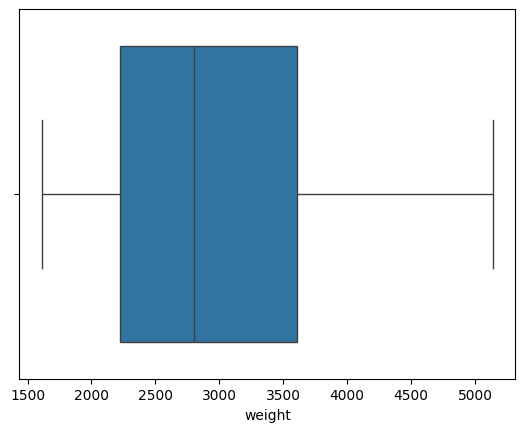

In [137]:
sns.boxplot(data=df,x='weight')